# 0. Dependências

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Introdução 

<img src="confusion-matrix.png" align="center"/>

<img src="complete-confusion-matrix.png" align="center"/>

<img src="type-errors.jpg" align="center"/>

<img src="metrics.png" align="center"/>

<img src="example.png" align="center"/>

Recomendações:

- introduza o algoritmo de forma breve. 
- defina-o formalmente e matematicamente.
- explique os passos necessário para resolver o algoritmo, quando necessário.
- se precisar, use fórmulas $\LaTeX$
- se possível, insira um pseudo-algoritmo
- a introdução deve conter somente texto, sem código

# 2. Dados

In [40]:
y_true = [1,0,1,1,1,0,0,1]  # Actual values of target column
y_pred = [1,1,1,1,1,1,0,1]  # predicted values by model

# 3. Implementação 

### Accuracy

$$
accuracy = \frac{TP+TN}{TP+FN+FP+TN}  
$$

In [41]:
# ===========================================

def accuracy(y_true, y_pred):
    correct_labels = 0
    for true, pred in zip(y_true,y_pred):
        if true == pred:
            correct_labels += 1
    return correct_labels / len(y_true)

result = accuracy(y_true, y_pred)
print(f"Accuracy {result}")

Accuracy 0.75


## True Positive rate

In [42]:
# Calculating individual components of confusion matrix
def true_positive(y_true, y_pred):
    """
    Input :- y_true - list of actual values
        y_pred - list of predicted values
    Output :- number of true positives
    """
    tp_counts = 0
    for true, pred in zip(y_true, y_pred):
        if true==1 and pred==1:
            tp_counts += 1
    return tp_counts

result = true_positive(y_true, y_pred)
print(f"True Positive {result}")

True Positive 5


In [43]:
def true_negative(y_true, y_pred):
    """
    Input :- y_true - list of actual values
            y_pred - list of predicted values
    Output :- number of true negatives
    """
    tn_counts = 0
    for true, pred in zip(y_true, y_pred):
        if true==0 and pred==0:
            tn_counts += 1
    return tn_counts

result = true_negative(y_true, y_pred)
print(f"True Negative {result}")

True Negative 1


In [44]:
def false_positive(y_true, y_pred):
    """
    Input :- y_true - list of actual values
            y_pred - list of predicted values
    Output :- number of false positives
    """
    fp_counts = 0
    for true,pred in zip(y_true, y_pred):
        if true==1 and pred==0:
            fp_counts += 1
    return fp_counts

result = false_positive(y_true, y_pred)
print(f"False Positive {result}")

False Positive 0


In [45]:
def false_negative(y_true, y_pred):
    """
    Input :- y_true - list of actual values
            y_pred - list of predicted values
    Output :- number of false negatives
    """
    fn_counts = 0
    for true, pred in zip(y_true, y_pred):
        if true==0 and pred==1:
            fn_counts += 1
    return fn_counts

result = false_negative(y_true, y_pred)
print(f"False Negative {result}")

False Negative 2


In [12]:
def get_confusion_matrix_components(y_ture, y_pred):

    """
    Input :- y_true - list of actual values
            y_pred - list of predicted values
    Output :- None
    """


    tp = true_positive(y_true, y_pred)  # Calculating ture positive
    print(f"True Positive {tp}")

    tn = true_negative(y_true, y_pred)  # Calculating ture negative
    print(f"True Negative {tn}")

    fp = false_positive(y_true, y_pred) # Calculating false positive
    print(f"False Positive {fp}")

    fn = false_negative(y_true, y_pred) # Calculating false negative
    print(f"False Negative {fn}")


get_confusion_matrix_components(y_true, y_pred)

True Positive 5
True Negative 1
False Positive 0
False Negative 2


In [47]:
# Calcuating accuracy score with confusion matrix components
def accuracy_score(y_true, y_pred):
    """
    Input :- y_true :- list of actual values
            y_pred :- list of predicted values
    Output:- float value of accuracy score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    accuracy_score = (tp+tn)/(tp+tn+fp+fn)
    return accuracy_score


acc_using_terms = accuracy_score(y_true, y_pred)
print(f"Accuracy : {acc_using_terms}")

Accuracy : 0.75


### Precision

In [52]:
# Calculating precision
def precision_score(y_true, y_pred):
    """
    Input :- y_true :- list of actual values
            y_pred :- list of predicted values
    Output:- float value of precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)

    precision_value = tp/(tp+fp)
    return precision_value

precision_value = precision_score(y_true, y_pred)
print(f"Precision value : {precision_value}")

Precision value : 1.0


### Recall

In [51]:
def recall_score(y_true, y_pred):
    """
    Input :- y_true :- list of actual values
            y_pred :- list of predicted values
    Output:- float value of precision score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall_value = tp/(tp+fn)
    return recall_value

recall_value = recall_score(y_true, y_pred)
print(f"Recall score value : {recall_value}")

Recall score value : 0.7142857142857143


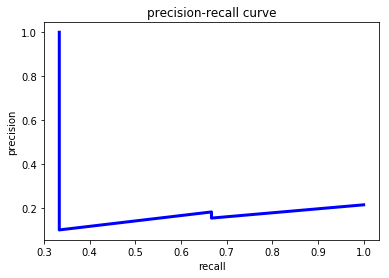

In [20]:
# Precision recall curves
import matplotlib.pyplot as plt
def precision_recall_treshholds(y_true, y_pred):
    # how we assumed these thresholds is a long story
    precisions = []
    recall = []
    thresholds = [0.0490937, 0.05934905, 0.079377,  0.08584789, 0.11114267, 0.11639273,  0.15952202, 0.17554844, 0.18521942,  0.27259048, 0.31620708, 0.33056815,  0.39095342, 0.61977213]
    for i in thresholds:
        temp_prediction = [1 if x >= i else 0 for x in y_pred]
        p = precision_score(y_true, temp_prediction)
        r = recall_score(y_true, temp_prediction)
        precisions.append(p)
        recall.append(r)

    return precisions, recall

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
0.15952202, 0.03819563, 0.11639273,0.079377, 0.08584789, 0.39095342,0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

precision_values, recall_values = precision_recall_treshholds(y_true, y_pred)

# based on precision and recall values we can draw precision recall curve
plt.title('precision-recall curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(precision_values, recall_values, color='blue', linewidth=3)
plt.show()

In [22]:
# Calcuating F1 score
def f1_score(y_true, y_pred):
    """
    Input :- y_true :- list of actual values
            y_pred :- list of predicted values
    Output:- float value of f1_score
    """
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)

    f1_score_value = 2 * p * r /(p+r)
    return f1_score_value

# Actual values of target column
y_true = [1,0,1,1,1,0,0,1]
# predicted values by model
y_pred = [1,1,1,1,1,1,0,1]

f1_score_value = f1_score(y_true, y_pred)
print(f"F1 score : {f1_score_value}")

F1 score : 0.8333333333333333


In [23]:
# Calculating logloss
import numpy as np
def log_loss(y_true, y_probabilities):
    #this value is used to clip probabilities
    epsilon = 1e-15
    losses = []

    for yt, yp in list(zip(y_true, y_probabilities)):

        temp_yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss
        temp_loss = - 1.0 * (yt*np.log(temp_yp) + (1-yt)*np.log(1- temp_yp))
        losses.append(temp_loss)

    return np.mean(losses)

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_probabilities = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491,
 0.17554844, 0.15952202, 0.03819563, 0.11639273,0.079377, 0.08584789, 0.39095342,
 0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213,
 0.33056815]

log_loss = log_loss(y_true, y_probabilities)
print(f"Log loss metric value {log_loss}")


Log loss metric value 0.4352001013091729


In [ ]:
class MyAlgorithm():
    def __init__(self):
        '''adicione os parâmetros necessários no __init__'''
        pass
    
    def fit(self, x, y):
        '''NÃO ALTERE OS PARÂMETROS DO MÉTODO FIT'''
        pass
        
    def predict(self, x):
        '''NÃO ALTERE OS PARÂMETROS DO MÉTODO PREDICT'''        
        pass

# 4. Teste 

## Comparação com o Scikit-learn

In [33]:
# ===========================================
y_true = [1,0,1,1,1,0,0,1]  # Actual values of target column
y_pred = [1,1,1,1,1,1,0,1]  # predicted values by model

# Accuracy with Scikit learn
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_true, y_pred)
print("Accuracy with Scikit-learn:: {}".format(model_accuracy))

Accuracy with Scikit-learn:: 0.75


In [34]:
## Logloss function with sklearn
from sklearn import metrics
def log_loss_metric(y_true, y_probabilities):
    return metrics.log_loss(y_true, y_probabilities)

y_true = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

y_probabilities = np.array([0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491,
 0.17554844, 0.15952202, 0.03819563, 0.11639273,0.079377, 0.08584789, 0.39095342,
 0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213,
 0.33056815])

log_loss = log_loss_metric(y_true, y_probabilities)
print(f"Result of Log Loss metric {log_loss}")

Result of Log Loss metric 0.4352001013091729


## 5. Referências

https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

https://en.wikipedia.org/wiki/Sensitivity_and_specificity